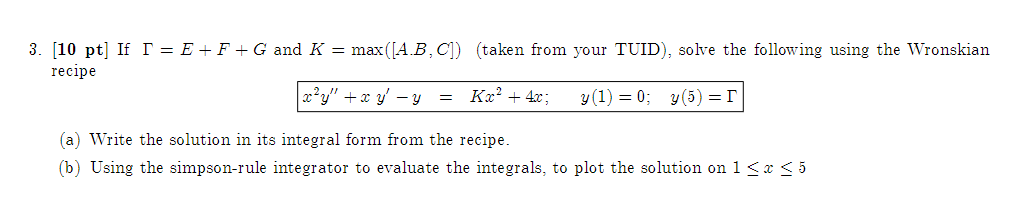

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def simpsons_rule(func, a, b, n):
    h = (b - a) / n
    s = func(a) + func(b)

    for i in range(1, n, 2):
        s += 4 * func(a + i * h)
    for i in range(2, n-1, 2):
        s += 2 * func(a + i * h)

    return (h/3) * s

def g(x):
    return 9*x**2 + 4*x

def y1(x):
    return x

def y2(x):
    return 1/x

def W(x):
    return -x * (1 + 1/x**2)

def integral1(x):
    return simpsons_rule(lambda t: y2(t) * g(t) / W(t), 1, x, 100)

def integral2(x):
    return simpsons_rule(lambda t: y1(t) * g(t) / W(t), 1, x, 100)

def yp(x):
    return -y1(x) * integral1(x) + y2(x) * integral2(x)

x_vals = np.linspace(1, 5, 400)
y_vals = [yp(x) for x in x_vals]

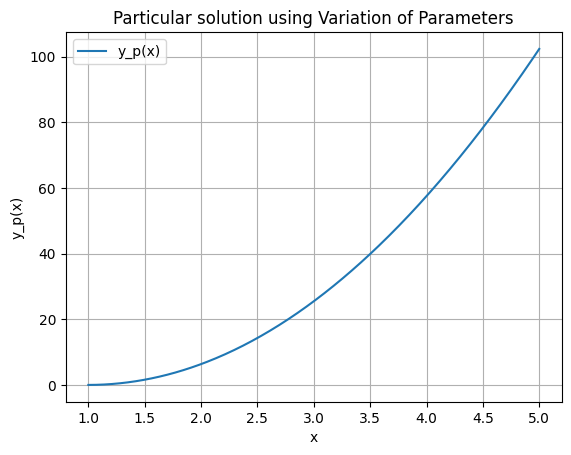

In [3]:
plt.plot(x_vals, y_vals, label='y_p(x)')
plt.xlabel('x')
plt.ylabel('y_p(x)')
plt.title('Particular solution using Variation of Parameters')
plt.legend()
plt.grid(True)
plt.show()
